In [3]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
import cv2
import os

DATA_PATH = '/Users/kai/workspace/data/CAUCAFall/CAUCAFall'
SUBJECT_COUNT = 10

### Setup

* Combine all the single-line label files into a single dataframe.

In [28]:
df = pd.DataFrame()
for subject in range(1, SUBJECT_COUNT + 1):
    folder_list = os.listdir(f"{DATA_PATH}/Subject.{subject}")
    for activity in folder_list:
        if not activity.startswith('.'):  # Skip .DS_Store and other hidden files
            cas_txt_file_list = [f for f in os.listdir(f"{DATA_PATH}/Subject.{subject}/{activity}") if f.endswith(".txt") and not f.startswith("classes")]
        else:
            cas_txt_file_list = []
        cas_txt_file_list.sort()
        for cas_txt_file in cas_txt_file_list:
            rdf = pd.read_csv(f"{DATA_PATH}/Subject.{subject}/{activity}/{cas_txt_file}", sep=" ", header=None)
            rdf.columns = ['class', 'x', 'y', 'w', 'h']
            rdf['subject'] = subject
            rdf['activity'] = activity
            rdf['cas_txt_file'] = cas_txt_file

            if df.empty:
                df = rdf
            else:
                df = pd.concat([df, rdf], ignore_index=True)

df.head()


,class,x,y,w,h,subject,activity,cas_txt_file
0,0,0.406944,0.231250,0.127778,0.400000,1,Pick up object,res100001.txt
1,0,0.431944,0.275000,0.150000,0.437500,1,Pick up object,res100002.txt
2,0,0.422222,0.268750,0.130556,0.425000,1,Pick up object,res100003.txt
3,0,0.425000,0.263542,0.125000,0.435417,1,Pick up object,res100004.txt
4,0,0.427083,0.267708,0.129167,0.443750,1,Pick up object,res100005.txt


In [30]:
# Save the combined dataframe to a csv file
df.to_csv(f"{DATA_PATH}/combined_df.csv", index=False)


In [32]:
# Load the combined dataframe from a csv file
df = pd.read_csv(f"{DATA_PATH}/combined_df.csv")


In [33]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,class[int64],1. 02. 1,"13,610 (68.1%)6,389 (31.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATxJREFUeJzt2zFqw0AQheHZIEzc7CIEOowOkcPmEHsbITRFbNxsipSJ0zi8jcb/d4IB/zZY6KXWmgEKyczOZnbqfQh+dWutXXof8ahhmqa3nPPY+xDc5+5bSun96MENOedxWZZLKeXa+xh8t+/7a611XNf1ZGbHjs3MrJRynef5o/cxuOvc+4C/8NL7ADwPYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZAazrxf0eh+Cn0X6bAZ332qtowV5QS8id9/M7Nb7jkcxeDmGEIOXxJQPKpF+2UJ8+yMLM+WLMneLLMSUL9LcLbJIUz7+Tf9zPNSFDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTIhpnxHv/9ZhJnyRZm7RcbgBTKfCltq30PBMc8AAAAASUVORK5CYII="">",0(0.0%)
2,x[float64],Mean (sd) : 0.5 (0.1)min < med < max:0.2 < 0.5 < 0.7IQR (CV) : 0.1 (6.0),694 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAsBJREFUeJzt3T+O2kAUgPE3YUEGhC0ggo4DsFIKSg6QMofNEYLEBUJLRYewkAlkEX9TrCJlpQ0bz+B43uz3q3ewi68Az6yfuV6vAvjuQ9k3APyLh7JvIETGmLqI1CyXH67X69M97ycEhHpnxph6t9v9Esdx22b9ZrNZG2O+EutLhHp/tTiO2+Px+ClJkn2ehVmWRdPptJ2maU1ECPUPhFqQJEn2vV7vp8XS+t1vJgD8mIIKhAoVCBUqECpUIFSoQKhQgVChAqFCBR74e+Z8PldFJDbG2H5EkGcFCPUvHA6WxJfLpWpzzd1uVz0ej58Gg0GlUqnk2n79LdSzAoT6CpeDJcfjMTqfz4/7/f6biOTaQj0cDg9RFDVGo9G+3++v81475LMChPo664Mli8WiPZvNGqfTqWJ78WazaXtOQCTQswKEeoPNwZL1eh1kKGXjVz9UIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFChWDf5uc44dn6ZbwoRpChuk54dnkZL4oRZKji8CJekfu8jBf3FWqoImI/4ZmX8fon6FDfI8epKt5OVCHUgLhOVfF5ogqhBsRlqorvE1UINUAOU1W8/W7OA3+oQKhQgVChgtffUcuYRwo/eRtqWfNI4SdvQ5WS55HCLz6HKiLMI8Uz70PF/+O4/SpS4BYsoUJE3LdfRYrdgiVUiIjb9qvI8xbsZDLppWn60RizsbmFW4ETKl6w3X4t+kBMoaHy7yDvR9EHYt4M1SG2qNPpfE6SpGmxlmehShV1IOZmqK4P3UXkcTgcfm+1Wj/yrl+tVtF8Pm9kWdZcLpeHPGu3220kIrLb7aLlctnIe22X9WWt1XztLMuit/7mFyFofqBI0BKSAAAAAElFTkSuQmCC"">",0(0.0%)
3,y[float64],Mean (sd) : 0.5 (0.1)min < med < max:0.2 < 0.6 < 0.9IQR (CV) : 0.2 (3.9),636 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAqpJREFUeJzt3Utu2lAUgOFzSwDzkC1EBTM2UKkDhl5EF9slBIkVsANmSBYywo2FMe4oUquSBD9ufI/7f/MbPPhlcm1zbIqiEMB1X9o+AOART20fQBcZY0YiMqi4/FIUxUuTx9MFhNowY8xoPp//8H1/VmX96XQ6GmN+EuvfCLV5A9/3Z2EYvgRBkJZZGMext9lsFlEUfTXGnCp+fifPyIRqSRAE6WKx+FVmTZIk/SzLvq9Wq16v1ysV+auunpEJ1SGXy+XJ87zxer1Ol8vlsez6OI697XY7i6JoICKECrsmk0nps/EfRo0ejCO4PAUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqMNLnDTVmnPq3263f9PH87wj1jjozTrMs8/I8/5am6bOIVJ0fVVme530R8Y0xVZY7O7KSUO+rPON0v9/Pdrvd+Hq99mwd3Fvqjq10eWQlob6jyozT4/HY2jS9OmMrXR9ZSagdVGNspbMjK9n1Q4XOnlFrvpmEnbtjOhlq3TeTtL1zx786GarU2LWLtLtzx31dDVVEqu3aRdrdueM+NlNQgVChAqFCBUKFCk5vpniCCa+cDVXzE0xontVQ694dmk6nizAMT5qeYIId1kJt6u7QcDh81vQEk2Y1n2UVsfg8q80zKneHFHH9FezW/0fl7pAOrr+C3dnNFNrh6ivYuY4KFQgVKnz41c9Fd7jg3VC56A5XfHRGVfmzYXTPQ7t+bT8bRvewmYIKhAoVCBUqcGcKjbE5oI1Q0QjbA9oIFY2wPaCNUNEoWwPa2ExBhYfOqHEce2X/8Pl89kREkiTxDofD+DPXa/1srcddd/0jff0G6zKn4GBx86MAAAAASUVORK5CYII="">",0(0.0%)
4,w[float64],Mean (sd) : 0.2 (0.1)min < med < max:0.1 < 0.2 < 0.4IQR (CV) : 0.1 (2.7),263 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAArVJREFUeJzt3bFu2kAYwPHvSqAGKgNCgo2VoVIHRh6iD9tH6MADIN6ADQkQCBcXY9wpmRJS7uz4vsv/t19yw19WLr47m6IoBPDdl7onAPyPp7oncI8xpi0iLcvhl6IozmXOB/XxNlRjTHs4HP6M43hgM/54PO6NMb+INQzehioirTiOB/P5/Nzr9dJHBh4Oh2ixWAy2221LRAg1AD6HKiIivV4vHY1GfyyGtkufDGrDYgoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChW83zhtK8/zpojExhjbH8GZK48EGWqSJM0sy35MJpNGo9F

### Observations

* There are 10 subjects performing 10 activities: 5 falling activities and 5 non-falling activities.
* 31.9% of the frames are falling frames, while the rest are non-falling frames.

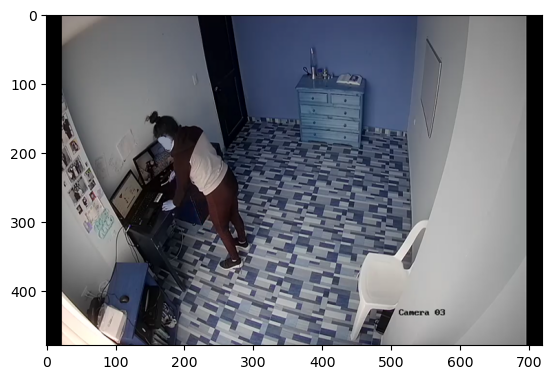

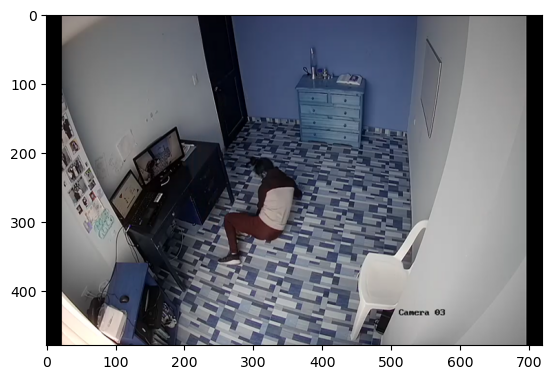

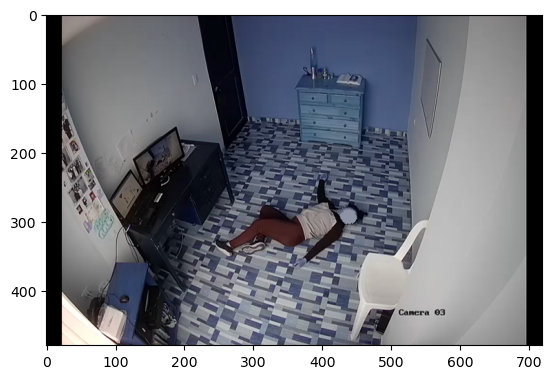

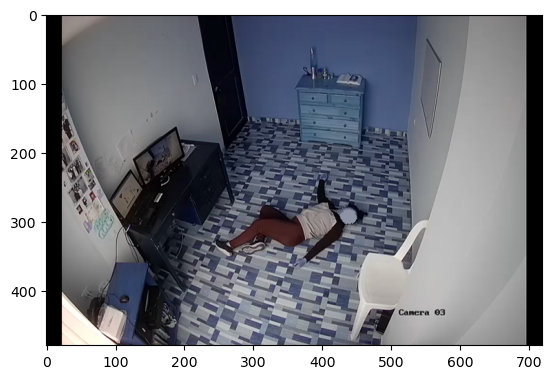

In [38]:
# Sort by subject and activity
df = df.sort_values(by=["subject", "activity"])

# Get the first subject's first activity
df_subject_1_activity_1 = df[
    (df["subject"] == df["subject"].unique()[0])
    & (df["activity"] == df["activity"].unique()[0])
]

# Get the first and last frames of the whole video
first = df_subject_1_activity_1.iloc[0]
last = df_subject_1_activity_1.iloc[-1]

# Get the first and last frame where class == 1 (falling)
dfs1a1Falling = df_subject_1_activity_1[df_subject_1_activity_1["class"] == 1]
first_falling = dfs1a1Falling.iloc[0]
last_falling = dfs1a1Falling.iloc[-1]

def get_img(rec):
    img_file = f"{DATA_PATH}/Subject.{rec['subject']}/{rec['activity']}/{rec['cas_txt_file'].replace('.txt', '.png')}"
    return cv2.imread(img_file)

imgFirst = get_img(first)
imgLast = get_img(last)
imgFirstFalling = get_img(first_falling)
imgLastFalling = get_img(last_falling)

plt.imshow(imgFirst)
plt.show()

plt.imshow(imgFirstFalling)
plt.show()

plt.imshow(imgLastFalling)
plt.show()

plt.imshow(imgLast)
plt.show()



### Observations

* It looks like, in this dataset, the falling process is well under way before the frames are classified as `falling`.